# Task 1 Data Analysis Pipeline
This part calls the data pipeline function 'load_and_process' to prepare the dataset of Kickstarter projects for analysis

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import os
import datetime

# For how to import the scripts folder so that it can be used:
# https://stackoverflow.com/questions/53049195/importing-custom-module-into-jupyter-notebook
# https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
sys.path.append('../scripts')

import project_functions
# relative import did not work for some reason
#from .. import project_functions

pathToData = '../../data/raw/ks-projects-201801.csv'

dfj = project_functions.load_and_process(pathToData)


# Task 3 | Explanatory Data Analysis | Jacob

The info function gives information on all the columns and there associated types. The result shows that the 'load_and_process' function of the data pipeline has worked correctly as the new **'stateInt'** (int64), **'duration'** (timedelta64)\[ns\], and **'durationInt'** (int 64) columns have been created with the correct types.

In [5]:
dfj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378657 entries, 0 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   Name              378657 non-null  object         
 1   category          378657 non-null  object         
 2   main_category     378657 non-null  object         
 3   currency          378657 non-null  object         
 4   deadline          378657 non-null  object         
 5   launched          378657 non-null  object         
 6   pledged           378657 non-null  float64        
 7   state             378657 non-null  object         
 8   backers           378657 non-null  int64          
 9   country           378657 non-null  object         
 10  usd_pledged_real  378657 non-null  float64        
 11  usd_goal_real     378657 non-null  float64        
 12  stateInt          378657 non-null  int64          
 13  duration          378657 non-null  timedelta

This function shows the number of unique values for each column.

In [6]:
print(dfj.nunique(axis=0))

Name                375764
category               159
main_category           15
currency                14
deadline              3164
launched            378085
pledged              62130
state                    6
backers               3963
country                 23
usd_pledged_real    106065
usd_goal_real        50339
stateInt                 6
duration            262412
percentFunded       168532
durationInt             99
dtype: int64


In [7]:
print(dfj.describe())

            pledged        backers  usd_pledged_real  usd_goal_real  \
count  3.786570e+05  378657.000000      3.786570e+05   3.786570e+05   
mean   9.683080e+03     105.618544      9.059018e+03   4.545425e+04   
std    9.563651e+04     907.189767      9.097382e+04   1.152956e+06   
min    0.000000e+00       0.000000      0.000000e+00   1.000000e-02   
25%    3.000000e+01       2.000000      3.100000e+01   2.000000e+03   
50%    6.200000e+02      12.000000      6.243800e+02   5.500000e+03   
75%    4.076000e+03      56.000000      4.050000e+03   1.550000e+04   
max    2.033899e+07  219382.000000      2.033899e+07   1.663614e+08   

            stateInt                    duration  percentFunded    durationInt  
count  378657.000000                      378657   3.786570e+05  378657.000000  
mean        0.642756  33 days 21:58:11.079641964   3.236154e+02      33.481127  
std         0.830139  65 days 21:55:37.956863723   2.669068e+04      65.909502  
min         0.000000             0 d

This plot shows the distribution of Kickstarter projects based on the duration of the project. Interestingly, this shows that 1 month long projects are the majority of projects composing about 47% of all projects. 2 month long and 1.5 month long projects are the next most common.

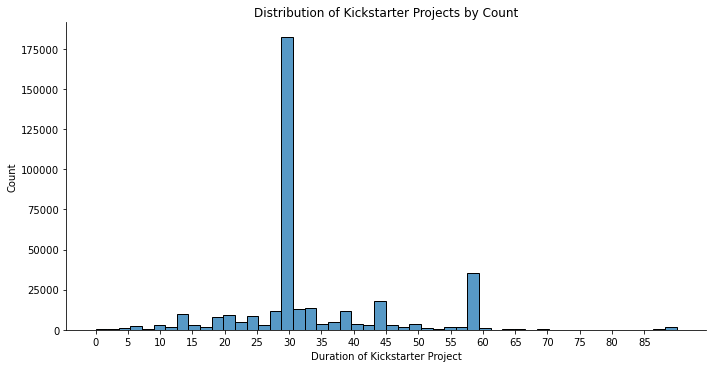

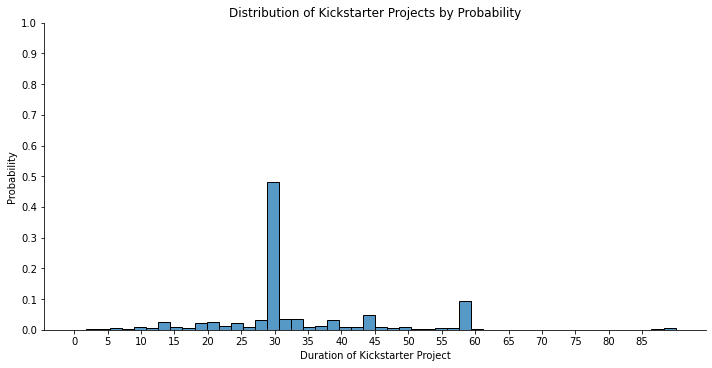

In [8]:

axes = sns.displot(data=dfj[dfj['durationInt'].between(0, 90)], x='durationInt', aspect=2.0, bins=50).set(title='Distribution of Kickstarter Projects by Count')
#axes = sns.displot(data=df, x='durationInt', aspect=2.0)
axes.set_axis_labels('Duration of Kickstarter Project', 'Count')
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
axes.set(xticks=np.arange(0, 90, 5))


# Learned how to use 'stat' parameter to get bins by probability and not count from user miro from here:
# https://stackoverflow.com/questions/40092294/creating-a-matplotlib-or-seaborn-histogram-which-uses-percent-rather-than-count
axes = sns.displot(data=dfj[dfj['durationInt'].between(0, 90)], x='durationInt', aspect=2.0, bins=50, stat='probability').set(title='Distribution of Kickstarter Projects by Probability')
axes.set_axis_labels('Duration of Kickstarter Project', 'Probability')
axes.set(xticks=np.arange(0, 90, 5), yticks=np.arange(0,1.1,0.1))

Here is another interesting plot which shows the distribution of the different possible states of a project. Since my research question is focused on how the duration of a project affects it success, I am going to focus on projects which have the states of 'failed/canceled' or 'successful'. The other states do not provide information about the success so they will be filter out.

<AxesSubplot:xlabel='state', ylabel='count'>

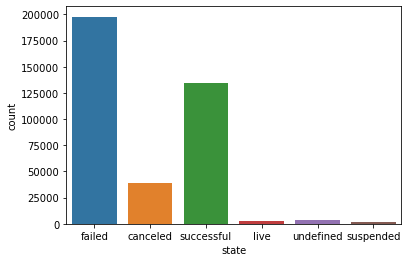

In [9]:
sns.countplot(x='state', data=dfj)

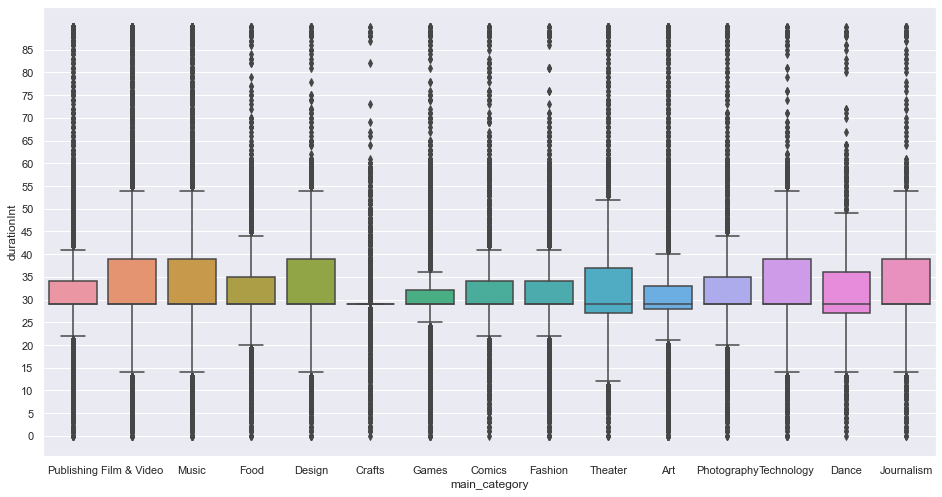

In [10]:
# Learned how to change seaborn plot size from user 'student' here:
# https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(16,8.27)})
box1 = sns.boxplot(data=dfj[dfj['durationInt'].between(0, 90)], y='durationInt', x='main_category')
box1.set(yticks=np.arange(0,90,5))
print()

KeyboardInterrupt: 

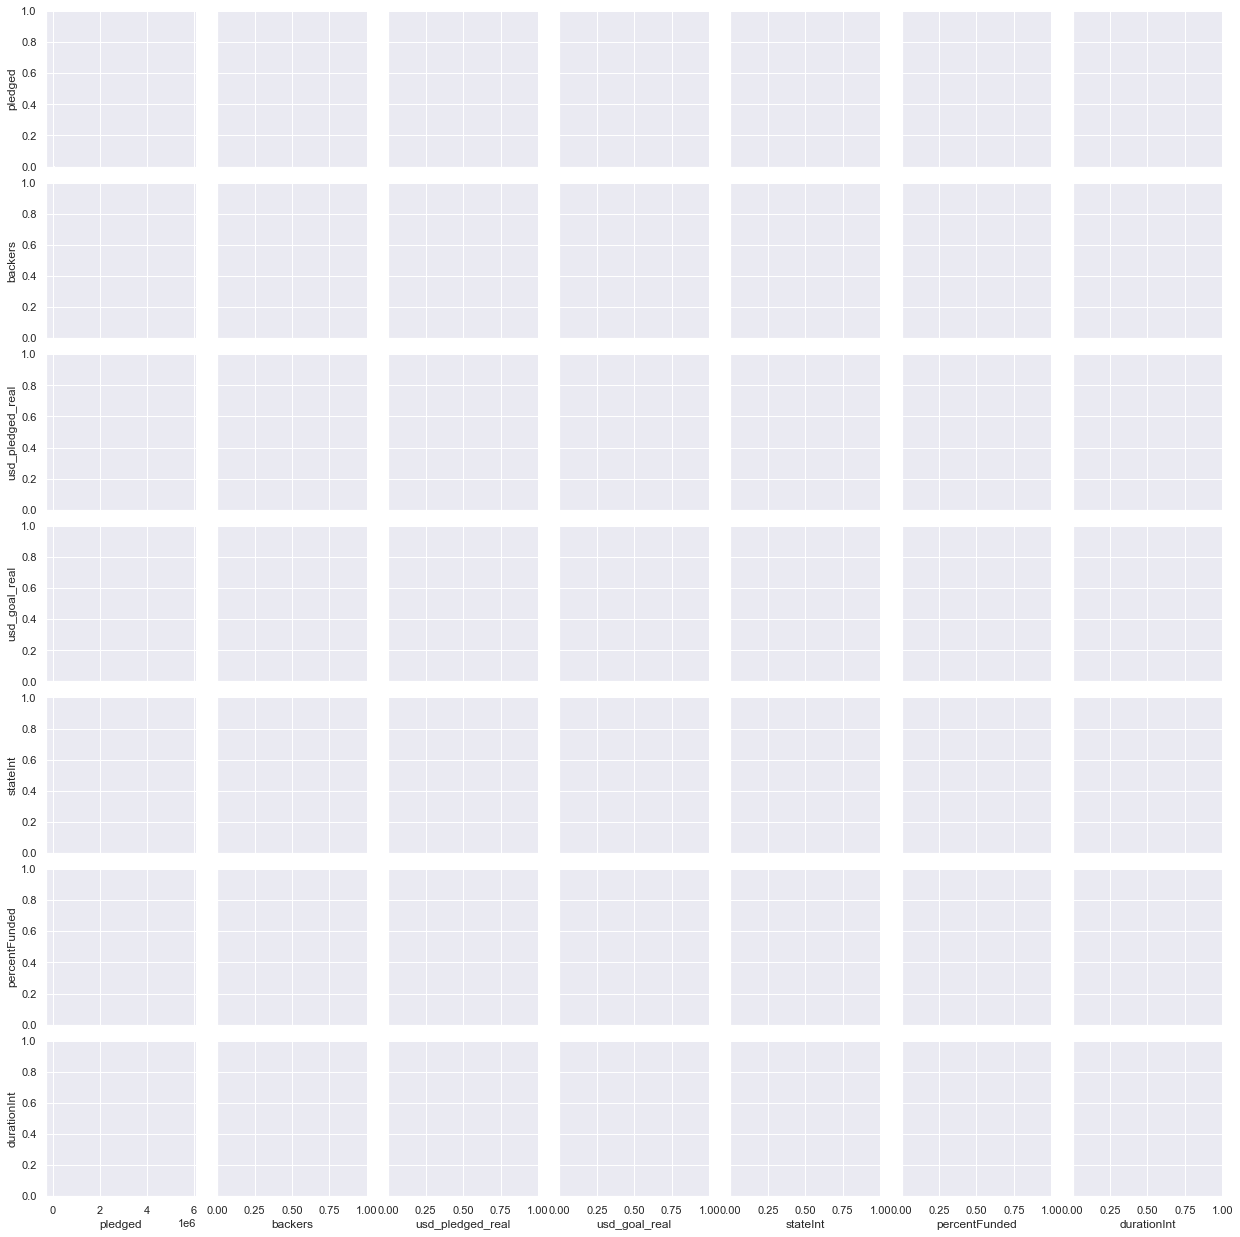

In [11]:
sns.pairplot(dfj)

# Task 3 | Explanatory Data Analysis | Rylan

# Task 4 | Analysis of Data to Answer Research Question | Jacob

# Task 4 | Analysis of Data to Answer Research Question | Rylan